In [17]:
import pdfplumber

# File path to the PDF
file_path = r"C:\Users\jamar\Downloads\Cleaned_Data_FOREIGN_DIRECT_INVESTMENT (1).pdf"

# Open the PDF and extract text from all pages
with pdfplumber.open(file_path) as pdf:
    full_text = ""
    for page in pdf.pages:
        full_text += page.extract_text()

# Print the extracted text
print(full_text)

Cleaned Data
Data for Africa:
Year Value
1 1990_Value 658.0
84 1991_Value 1336.0
167 1992_Value 2385.0
250 1993_Value 576.0
333 1994_Value 1912.0
416 1995_Value 2976.0
499 1996_Value 1817.0
582 1997_Value 3557.0
665 1998_Value 1619.0
748 1999_Value 2603.0
831 2000_Value 1548.0
914 2001_Value -2639.0
997 2002_Value 368.0
1080 2003_Value 1377.0
1163 2004_Value 2961.0
1246 2005_Value 2011.0
1329 2006_Value 8186.0
1412 2007_Value 10827.0
1495 2008_Value 9954.0
1578 2009_Value 6374.0
1661 2010_Value 10399.0
1744 2011_Value 5318.0
1827 2012_Value 10527.0
1910 2013_Value 11032.0
1993 2014_Value 10523.0
2076 2015_Value 9607.0
2159 2016_Value 8410.0
2242 2017_Value 11233.0
2325 2018_Value 7899.0
2408 2019_Value 5122.0
2491 2020_Value 2465.0
2574 2021_Value 5144.0
2657 2022_Value 9232.0
2740 2023_Value 61.0
Data for Americas:
Year Value
2 1990_Value 37582.0
85 1991_Value 40149.0
168 1992_Value 48869.0251 1993_Value 85512.0
334 1994_Value 86788.0
417 1995_Value 107292.0
500 1996_Value 100725.0
58

In [11]:
from scipy.stats import kruskal

# Perform Kruskal-Wallis test for each country/region
kruskal_results = {}
for country in countries:
    country_data = df_aggregated[df_aggregated['Economy_Label'] == country]
    
    # Group the data by year and perform Kruskal-Wallis test
    grouped_years = [country_data[country_data['Year'] == year]['Value'] for year in country_data['Year'].unique()]
    
    if len(grouped_years) > 1:  # Ensure there are multiple groups for Kruskal-Wallis
        h_stat, p_value = kruskal(*grouped_years)
        kruskal_results[country] = {'H-Statistic': h_stat, 'P-Value': p_value}
    else:
        kruskal_results[country] = {'H-Statistic': 'Insufficient data', 'P-Value': 'Insufficient data'}

# Display Kruskal-Wallis results
print("Kruskal-Wallis Test Results:")
for country, result in kruskal_results.items():
    print(f"{country}: H-Statistic = {result['H-Statistic']}, P-Value = {result['P-Value']}")

Kruskal-Wallis Test Results:
Africa: H-Statistic = 2.0, P-Value = 0.36787944117144245
Americas: H-Statistic = 1.0, P-Value = 0.31731050786291115
Argentina: H-Statistic = 1.0, P-Value = 0.31731050786291115


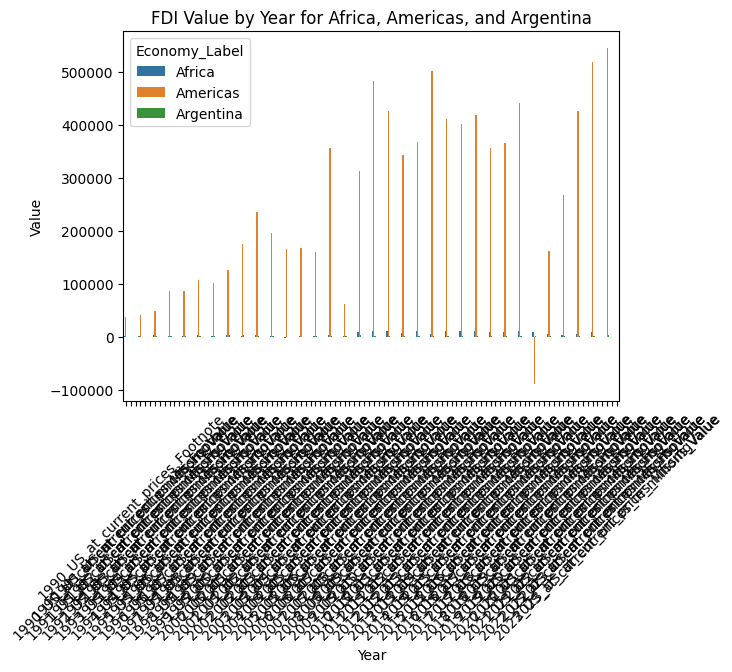

In [16]:
# Extract data for each country from the cleaned dataframe
africa_data = df_melted[df_melted['Economy_Label'] == 'Africa']
americas_data = df_melted[df_melted['Economy_Label'] == 'Americas']
argentina_data = df_melted[df_melted['Economy_Label'] == 'Argentina']

# Combine data for all three countries
combined_data = pd.concat([africa_data, americas_data, argentina_data])

# Create a bar plot for all countries
sns.barplot(data=combined_data, x='Year', y='Value', hue='Economy_Label')
plt.title('FDI Value by Year for Africa, Americas, and Argentina')
plt.xticks(rotation=45)
plt.show()